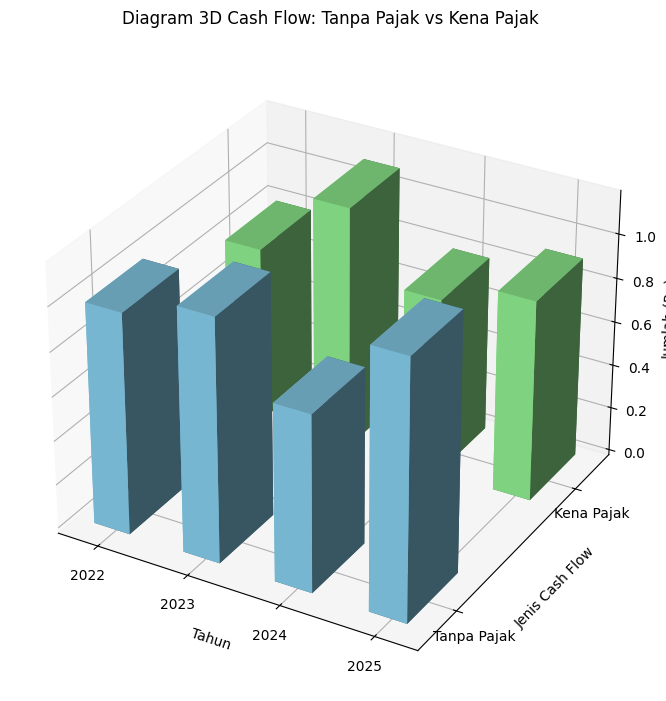

In [4]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load data dari file JSON
with open("output.py") as f:
    data_keuangan = json.load(f)

with open("output (2).py") as f:
    data_pajak = json.load(f)

# Ubah data pajak jadi dictionary
pajak_dict = {item["tahun"]: item for item in data_pajak}

# Fungsi perhitungan
def hitung_laba_sebelum_pajak(pendapatan, beban_operasional, penyusutan):
    return pendapatan - beban_operasional - penyusutan

def hitung_pajak(tahun, laba, skenario):
    pajak_info = pajak_dict.get(tahun)
    if skenario == "tax holiday":
        return 0
    return laba * pajak_info["tax_rate"] if laba > 0 else 0

# Siapkan data untuk plotting
tahun_list = []
cashflow_tanpa_pajak = []
cashflow_kena_pajak = []

for item in data_keuangan:
    tahun = item["tahun"]
    laba = hitung_laba_sebelum_pajak(item["pendapatan"], item["beban_operasional"], item["penyusutan"])
    pajak = hitung_pajak(tahun, laba, item["skenario"])

    cf_tanpa = laba + item["penyusutan"]
    cf_kena = laba - pajak + item["penyusutan"]

    tahun_list.append(tahun)
    cashflow_tanpa_pajak.append(cf_tanpa)
    cashflow_kena_pajak.append(cf_kena)

# Konversi ke numpy array
x = np.arange(len(tahun_list))
y = np.array([0, 1])  # 0: tanpa pajak, 1: kena pajak
xpos, ypos = np.meshgrid(x, y, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Tinggi batang
dz = []
for i in range(len(tahun_list)):
    dz.append(cashflow_tanpa_pajak[i])
    dz.append(cashflow_kena_pajak[i])
dz = np.array(dz)

# Ukuran batang
dx = dy = 0.4

# Buat figure dan plot 3D
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True,
         color=['skyblue' if i % 2 == 0 else 'lightgreen' for i in range(len(dz))])

# Label sumbu
ax.set_xlabel('Tahun')
ax.set_ylabel('Jenis Cash Flow')
ax.set_zlabel('Jumlah (Rp)')
ax.set_yticks([0.2, 1.2])
ax.set_yticklabels(['Tanpa Pajak', 'Kena Pajak'])
ax.set_xticks(x + 0.2)
ax.set_xticklabels(tahun_list)

# Judul
plt.title('Diagram 3D Cash Flow: Tanpa Pajak vs Kena Pajak', pad=20)

# Penyesuaian manual layout agar tidak terlalu rapat
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()


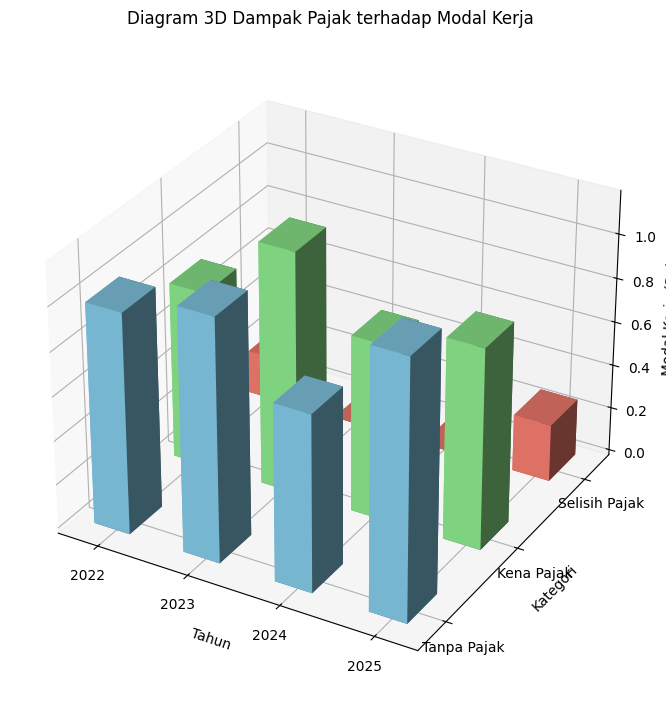

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data dari file
with open("output.py") as f:
    data_keuangan = json.load(f)

with open("output (2).py") as f:
    data_pajak = json.load(f)

# Persiapkan dictionary tarif pajak
pajak_dict = {item["tahun"]: item for item in data_pajak}

# Fungsi hitung
def hitung_laba_sebelum_pajak(pendapatan, beban_operasional, penyusutan):
    return pendapatan - beban_operasional - penyusutan

def hitung_pajak(tahun, laba, skenario):
    if skenario == "tax holiday":
        return 0
    return laba * pajak_dict[tahun]["tax_rate"] if laba > 0 else 0

# Data untuk plot
tahun_list = []
modal_tanpa_pajak = []
modal_kena_pajak = []
selisih_pajak = []

for item in data_keuangan:
    tahun = item["tahun"]
    skenario = item["skenario"]
    laba = hitung_laba_sebelum_pajak(item["pendapatan"], item["beban_operasional"], item["penyusutan"])
    pajak = hitung_pajak(tahun, laba, skenario)

    modal1 = laba + item["penyusutan"]
    modal2 = laba - pajak + item["penyusutan"]
    selisih = modal1 - modal2

    tahun_list.append(str(tahun))
    modal_tanpa_pajak.append(modal1)
    modal_kena_pajak.append(modal2)
    selisih_pajak.append(selisih)

# Persiapan 3D chart
x = np.arange(len(tahun_list))
y_labels = ['Tanpa Pajak', 'Kena Pajak', 'Selisih Pajak']
y = np.array([0, 1, 2])
xpos, ypos = np.meshgrid(x, y, indexing='ij')
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Gabungkan nilai tinggi batang
dz = []
for i in range(len(tahun_list)):
    dz.append(modal_tanpa_pajak[i])
    dz.append(modal_kena_pajak[i])
    dz.append(selisih_pajak[i])
dz = np.array(dz)

# Ukuran batang dan warna
dx = dy = 0.4
colors = ['skyblue', 'lightgreen', 'salmon'] * len(tahun_list)

# Plotting
fig = plt.figure(figsize=(14, 8))  # Ukuran diperbesar
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, shade=True)

# Label sumbu
ax.set_xlabel('Tahun')
ax.set_ylabel('Kategori')
ax.set_zlabel('Modal Kerja (Rp)')
ax.set_xticks(np.arange(len(tahun_list)) + 0.2)
ax.set_xticklabels(tahun_list)
ax.set_yticks([0.2, 1.2, 2.2])
ax.set_yticklabels(y_labels)
plt.title('Diagram 3D Dampak Pajak terhadap Modal Kerja', pad=20)

# Penyesuaian manual layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()


In [6]:
import json

# Muat data dari file
with open("output.py") as f:
    data_keuangan = json.load(f)

with open("output (2).py") as f:
    data_pajak = json.load(f)

# Siapkan data pajak berdasarkan tahun
pajak_dict = {item["tahun"]: item for item in data_pajak}

# Fungsi perhitungan
def hitung_laba_sebelum_pajak(pendapatan, beban_operasional, penyusutan):
    return pendapatan - beban_operasional - penyusutan

def hitung_pajak(tahun, laba, skenario):
    if skenario == "tax holiday":
        return 0
    rate = pajak_dict[tahun]["tax_rate"]
    return laba * rate if laba > 0 else 0

# Header tabel
print(f"{'Tahun':<6} | {'Modal Kerja (Tanpa Pajak)':>30} | {'Modal Kerja (Kena Pajak)':>30} | {'Selisih Dampak Pajak':>25}")
print("-" * 100)

# Isi tabel
for item in data_keuangan:
    tahun = item["tahun"]
    pendapatan = item["pendapatan"]
    beban = item["beban_operasional"]
    penyusutan = item["penyusutan"]
    skenario = item["skenario"]

    laba = hitung_laba_sebelum_pajak(pendapatan, beban, penyusutan)
    pajak = hitung_pajak(tahun, laba, skenario)

    modal_kerja_tanpa_pajak = laba + penyusutan
    modal_kerja_kena_pajak = laba - pajak + penyusutan
    selisih = modal_kerja_tanpa_pajak - modal_kerja_kena_pajak

    print(f"{tahun:<6} | Rp{modal_kerja_tanpa_pajak:>28,.0f} | Rp{modal_kerja_kena_pajak:>28,.0f} | Rp{selisih:>23,.0f}")


Tahun  |      Modal Kerja (Tanpa Pajak) |       Modal Kerja (Kena Pajak) |      Selisih Dampak Pajak
----------------------------------------------------------------------------------------------------
2022   | Rp                 100,000,000 | Rp                  80,200,000 | Rp             19,800,000
2023   | Rp                 110,000,000 | Rp                 110,000,000 | Rp                      0
2024   | Rp                  80,000,000 | Rp                  80,000,000 | Rp                      0
2025   | Rp                 117,000,000 | Rp                  91,000,000 | Rp             26,000,000
